<a href="https://colab.research.google.com/github/Srishti6125/Spam-Ham-Mail-Prediction/blob/main/Spam_Mail_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PROBLEM STATEMENT

With the rise of digital communication, email remains one of the most widely used platforms. However, the increasing volume of spam emails—ranging from advertisements to phishing attempts—poses security and productivity challenges. Manual filtering is inefficient, and rule-based methods fail to adapt to evolving spam strategies.

This project aims to build an ML-based email classification system that automatically categorizes emails as Spam or Ham (Not Spam) using Natural Language Processing (NLP) and machine learning models.

### SUMMARY

Dataset: A labeled dataset of emails marked as spam or ham.

Text Preprocessing:
* Lowercasing, punctuation removal, stopword removal, lemmatization.
* Conversion into numerical form using TF-IDF Vectorizer.

Modeling:
* Trained machine learning models (Logistic Regression).
* Evaluated models using accuracy, precision and recall.


### Importing Libraries and Dataset

In [ ]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [ ]:
# loading dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/spam_ham_dataset.csv')

### Text Pre-Processing

In [ ]:
# columns in dataset

df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [ ]:
# viewing dataset

df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
# dropping uneccesary columns

df.drop(['Unnamed: 0', 'label'], axis=1, inplace=True)

In [ ]:
# checking for null values

df.isnull().sum()

,0
text,0
label_num,0


In [ ]:
# counting number of spam-ham mails (1-spam, 0-ham)

df['label_num'].value_counts()

,count
label_num,
0,3672
1,1499


In [ ]:
# downloading required info

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# text pre-processing

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(text, use_stem=False, use_lemma=True):

    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)

    words = word_tokenize(text)       # tokenizing words

    words = [w for w in words if w not in stopwords.words('english')]         # remove stopwords

    # stemming or lemmatization
    if use_stem:
        words = [stemmer.stem(w) for w in words]
    if use_lemma:
        words = [lemmatizer.lemmatize(w) for w in words]

    return " ".join(words)

df['processed_text'] = df['text'].apply(preprocess)

### Data Splitting and Modelling

In [ ]:
# defining x and y

x = df['processed_text']
y = df['label_num']

In [ ]:
# splitting dataset in training and testing data (80-20)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# convert text data into numerical data

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
x_train = vectorizer.fit_transform(x_train)   # learn vocab
x_test = vectorizer.transform(x_test)        # apply vocab

In [ ]:
# creating model

model = LogisticRegression(class_weight="balanced", random_state=42, max_iter=2000)
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)

In [ ]:
# training model

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [ ]:
# training accuracy

print('training accuracy :- ',accuracy_score(y_train,train_pred))
print('training confusion matrix :- \n',confusion_matrix(y_train,train_pred))
print('training precision :- ',precision_score(y_train,train_pred))
print('training recall :- ',recall_score(y_train,train_pred))

training accuracy :-  0.9811411992263056
training confusion matrix :- 
 [[2852   78]
 [   0 1206]]
training precision :-  0.9392523364485982
training recall :-  1.0


In [ ]:
# testing accuracy

print('testing accuracy :- ',accuracy_score(y_test,test_pred))
print('testing confusion matrix :- \n',confusion_matrix(y_test,test_pred))
print('testing precision :- ',precision_score(y_test,test_pred))
print('testing recall :- ',recall_score(y_test,test_pred))

testing accuracy :-  0.9719806763285024
testing confusion matrix :- 
 [[715  27]
 [  2 291]]
testing precision :-  0.9150943396226415
testing recall :-  0.9931740614334471


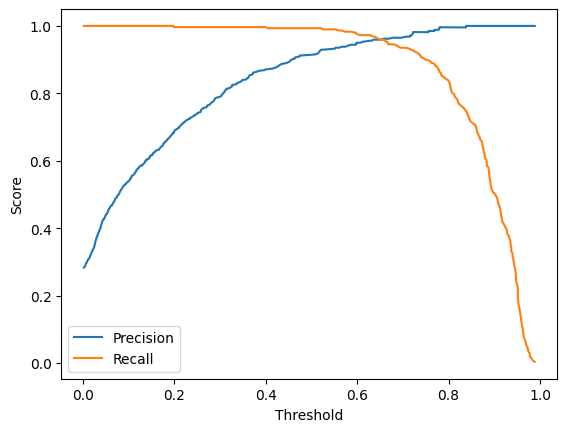

Optimal Threshold: 0.6289287195839045


In [ ]:
y_scores = model.predict_proba(x_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# plot the curve
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

# find best threshold (maximize F1 = balance of precision & recall)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[f1_scores.argmax()]
print("Optimal Threshold:", best_threshold)

### Predictive System

In [ ]:
# building spam-ham predictive system

input_data = input("Enter your message: ")

processed = preprocess(input_data)
data = vectorizer.transform([processed])

spam_prob = model.predict_proba(data)[0][1]

# lower the threshold from 0.63 to 0.55 to catch borderline spam messages like this
threshold = 0.55
if spam_prob > threshold:
    label = "🚨 Spam message detected!"
else:
    label = "✅ Not spam (ham)."

print(f"{label} | Spam probability: {spam_prob:.2f}")

Enter your message: please contact me
✅ Not spam (ham). | Spam probability: 0.22


### CONCLUSION

The Spam-Ham Email Classifier successfully detects spam with strong accuracy and generalization ability. Compared to manual or rule-based filtering, this ML approach:
* Improves reliability by adapting to new spam trends.
* Reduces false positives (ham misclassified as spam).
* Ensures efficiency in handling large volumes of emails.

This project demonstrates the practical application of NLP and ML in solving real-world cybersecurity and productivity problems